In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math
import numpy as np


In [ ]:
p = pd.read_csv("changepoint.tab", sep='\t', lineterminator='\n')
p=p.drop(['impact_scalar','comment'],axis=1)
change = {}
df = p.reset_index()  
for index, row in df.iterrows():
  if row['file_id'] not in change:
    change[row['file_id']] = [(row['timestamp'])]
  else:
    change[row['file_id']].append(row['timestamp'])

In [ ]:
seg = pd.read_csv("segments.tab", sep='\t', lineterminator='\n')
file2seg = {}
df = seg.reset_index()  
for index, row in df.iterrows():
  if (row['file_id']) not in file2seg:
    file2seg[row['file_id']] = [(row['segment_id'])]
  else:
    file2seg[row['file_id']].append(row['segment_id'])

In [ ]:

segments = {}
df = seg.reset_index()  
for index, row in df.iterrows():
    segments[row['segment_id']]=[row['start'],row['end']]
    
normsf = pd.read_csv("norms.tab", sep='\t', lineterminator='\n')
norms = {}
df = normsf.reset_index()  
for index, row in df.iterrows():
  if(row['status']!='EMPTY_NA'):
    if row['file_id'] not in norms:
      norms[row['file_id']] = [segments[row['segment_id']]]
    else:
      norms[row['file_id']].append(segments[row['segment_id']])

KeyboardInterrupt: ignored

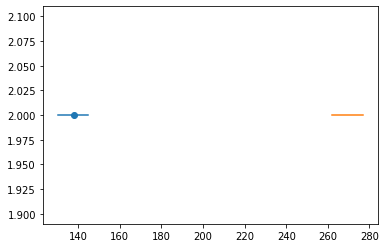

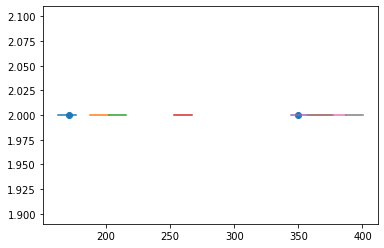

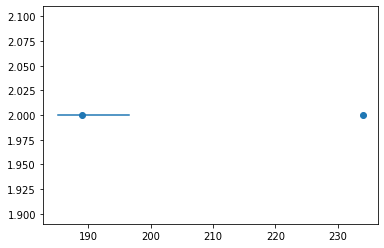

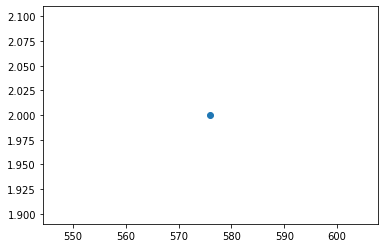

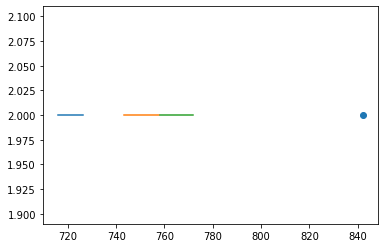

In [ ]:
# it = 1
# pp = PdfPages('hello.pdf')
# for key in change:
#   fig = plt.figure()
#   plt.scatter(change[key],[2]*len(change[key]))
#   if key in norms:
#     for seg in norms[key]:
#       plt.plot(seg,[2,2])  
#   pp.savefig(fig)

# pp.close()
# plt.show()


{120: 21, 210: 16, 30: 21, -10: 36, -40: 15, -80: 8, 80: 15, 0: 36, -260: 0, 180: 15, 90: 16, -180: 5, -140: 3, -120: 6, -150: 0, 160: 9, 10: 15, 170: 12, 140: 12, -170: 5, -190: 2, 40: 12, 100: 7, -220: 3, -20: 10, 60: 20, -90: 2, -200: 3, 300: 4, 540: 1, 380: 1, -60: 6, 440: 2, 70: 22, 110: 12, 260: 5, 350: 2, 240: 3, 190: 12, 310: 1, 130: 14, 500: 0, 400: 0, 750: 0, 530: 1, -300: 0, -100: 3, 340: 0, 290: 1, 410: 0, 50: 22, 390: 3, 330: 1, 150: 13, 420: 3, 470: 0, 320: 1, -130: 3, -340: 0, -440: 0, 360: 0, 510: 1, 250: 6, -30: 8, 450: 0, 280: 1, -110: 3, 220: 7, -160: 0, -210: 2, 200: 9, -50: 5, 20: 17, 270: 2, -70: 2, 230: 7, -270: 0}


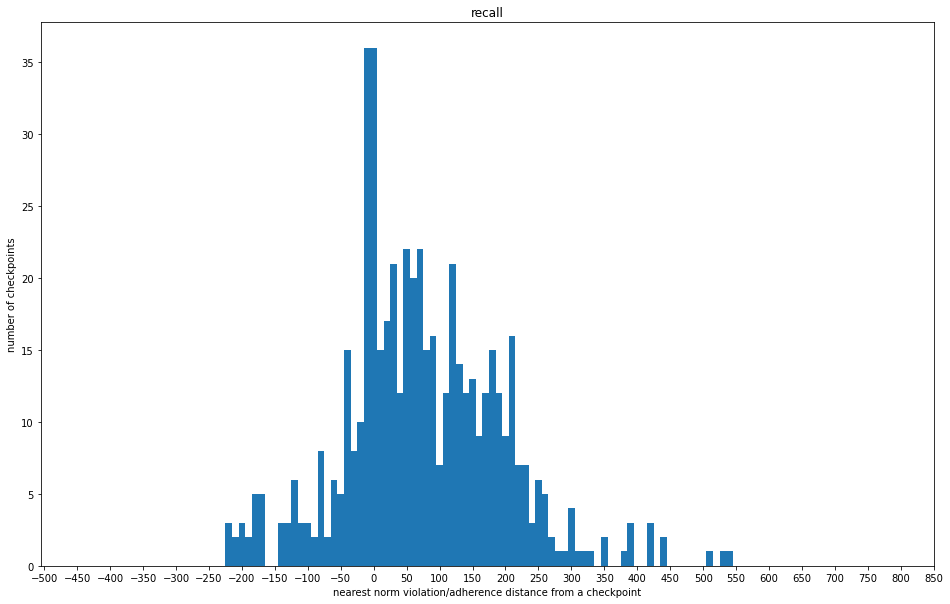

In [ ]:
import math
import numpy as np

dic ={}
for key in change:
  for change_time in change[key]:
    if key in norms:
      mini=1000
      for seg in norms[key]:
        val = seg[0]-change_time
        end = seg[1]-change_time
        if abs(end)<abs(val):
          val=end
        if abs(val)<abs(mini):
          mini=val
      p =int(math.floor(val/10)*10)
      if p in dic:
        dic[p]+=1
      else:
        dic[p]=0
print(dic)
x=list(dic.keys())
fig,ax = plt.subplots(figsize=(16,10))
ax.bar(x,list(dic.values()),width=10)
plt.xticks(np.arange(-500,900,step=50))
plt.title('recall')
plt.xlabel("nearest norm violation/adherence distance from a checkpoint")
plt.ylabel("number of checkpoints")
plt.show()

      


  

In [ ]:
print(change)
print(segments)
print(norms)

{'M0100054L': [138.0], 'M0100054S': [171.0, 350.0], 'M0100054Z': [189.0, 234.0], 'M0100055J': [576.0], 'M010005DJ': [842.0], 'M010005FS': [660.0], 'M010005G2': [71.0], 'M010005GC': [750.0], 'M010005GO': [1166.0], 'M010005NF': [785.0, 925.0], 'M010006KW': [54.0], 'M010006RQ': [131.0], 'M010006YT': [96.0], 'M010006ZL': [100.0, 319.0], 'M010006ZX': [630.0], 'M01000721': [286.0], 'M010007RK': [348.0], 'M010007RX': [287.0], 'M010007SY': [142.0, 357.0], 'M010007TU': [192.0], 'M010007UV': [177.0], 'M010007VV': [152.0, 191.0], 'M010007WC': [301.0], 'M010007WJ': [104.0], 'M010007X3': [125.0], 'M010007XB': [298.0], 'M010007Y7': [302.0], 'M0100082W': [338.0], 'M0100082Z': [174.0], 'M0100084L': [97.0], 'M0100085G': [333.0], 'M0100085K': [203.0, 292.0], 'M0100085W': [220.0], 'M0100089S': [263.0], 'M010008AD': [160.0], 'M010008AV': [140.0, 62.0], 'M010008CL': [333.0], 'M010008CV': [326.0], 'M010008DH': [266.0], 'M010008DV': [46.0], 'M010008E0': [195.0], 'M010008FC': [240.0], 'M010008G5': [63.0], 'M0

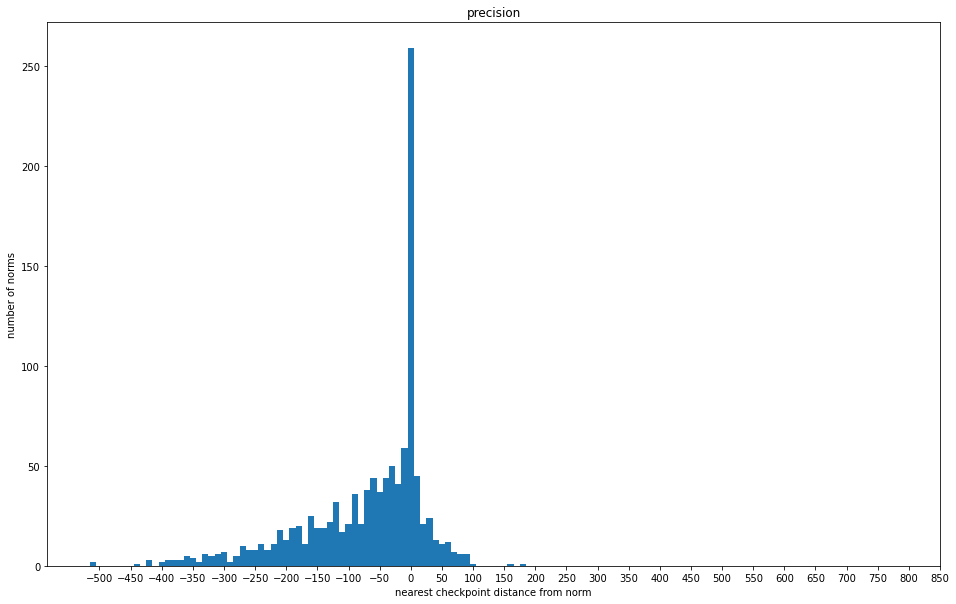

In [ ]:
import math
import numpy as np

dic={}
  
for key in norms:
  full=[]
  dist=[]
  ba=[]
  for nm in norms[key]:
    a=nm[0]
    b=nm[1]
    mid=(a+b)/2
    full.append((mid,b-mid,'n'))
  if key in change:
    for cp in change[key]:
      full.append((cp,'c'))
  full.sort(key=lambda a: a[0])
  cp = -1
  for  item in full:
    if(len(item)==2):
      cp=item[0]
    else:
      if cp==-1:
        dist.append(-1)
        ba.append('b')
      elif(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
        dist.append(0)
        ba.append('b')
      else:
        dist.append(abs(item[0]-item[1]-cp))
        ba.append('b')

  cp = -1
  i=len(dist)
  for item in full[::-1]:
    if(len(item)==2):
      cp=item[0]
    else:
      i-=1
      if cp!=-1:
        if(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
          dist[i]=0
        else:
          dist[i]=min(dist[i],abs(cp-item[0]-item[1]))
          ba[i]='a'
      

  for i in range(0,len(dist)):
    val=dist[i]
    if val!=-1:
      p =int(math.floor(val/10)*10)
      if ba[i]=='b':
        p=-p
      if p in dic:
        dic[p]+=1
      else:
        dic[p]=0

x=list(dic.keys())
fig,ax = plt.subplots(figsize=(16,10))
ax.bar(x,list(dic.values()),width=10)
plt.xticks(np.arange(-500,900,step=50))
plt.xlabel("nearest checkpoint distance from norm")
plt.ylabel("number of norms")
plt.title("precision")
plt.show()




  
#   traverse from right to left update dist
#   traverse from left to right update dist
#   then traverse list again store dist in bucket

# plot bucket


[0.22861842105263158, 0.2582236842105263, 0.27960526315789475, 0.3092105263157895, 0.3651315789473684, 0.3848684210526316, 0.40625, 0.4342105263157895, 0.45230263157894735, 0.47368421052631576, 0.5098684210526315, 0.5328947368421053, 0.555921052631579, 0.5855263157894737, 0.6085526315789473, 0.6332236842105263, 0.6743421052631579, 0.7055921052631579, 0.7351973684210527, 0.7549342105263158, 0.774671052631579, 0.7976973684210527, 0.8240131578947368, 0.8569078947368421, 0.881578947368421, 0.9029605263157895, 0.9259868421052632, 0.944078947368421, 0.9786184210526315, 1.0148026315789473]
[0.2896859304336953, 0.28285740023421313, 0.2697256731242166, 0.26648145260740763, 0.28435654724545606, 0.2733868423819705, 0.2652633839875423, 0.26232896449615944, 0.25425530931314083, 0.24896050345346254, 0.25161724957996157, 0.24784853700516352, 0.2444899346821269, 0.24422202251507524, 0.24137098720733766, 0.23940850553126924, 0.24356194493123828, 0.24394820791893415, 0.24375746404986395, 0.2404387614522

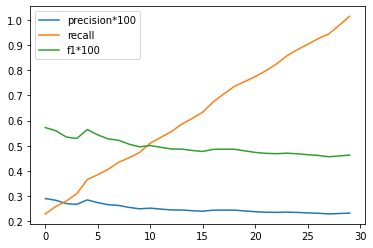

In [ ]:
from matplotlib.widgets import RectangleSelector

import math
import numpy as np

dval =[]
rec=[]
prec=[]
f1=[]

for d in range(30):  
  dval.append(d)
  fpf=0
  tpf=0
  fnf=0
  for key in norms:
    fp=0
    tp=0
    fn=0
    changepoint =[ ]
    if key in change:
      changepoint = change[key]
    for nm in norms[key]:
      a=nm[0]
      b=nm[1]
      for p in range(math.ceil(a-d),math.floor(b+d)):
        if(p in changepoint):
          tp+=1
        else:
          fp+=1
    fn += len(changepoint)-tp
    fpf+=fp
    tpf+=tp
    fnf+=fn
    
      
  recall = tpf/(tpf+fnf)
  precision = tpf/(tpf+fpf)
  f1val=2*precision*recall/(precision+recall)
  f1.append(f1val*100)
  rec.append(recall)
  prec.append(precision*100)


print(rec)
print(prec)
print(f1)
plt.plot(dval,prec,label='precision*100')
plt.plot(dval,rec,label='recall')
plt.plot(dval,f1,label='f1*100')
plt.legend()
plt.show()



  



  

In [ ]:
file = pd.read_csv("file_info.tab", sep='\t', lineterminator='\n')
file_dict={}
file_types=[]
df = file.reset_index()  
for index, row in df.iterrows():
  file_dict[row["file_uid"]]=row["data_type"]
  if row["data_type"] not in file_types:
    file_types.append(row["data_type"])



In [ ]:
file_types.remove(".ltf.xml")

.flac.ldcc


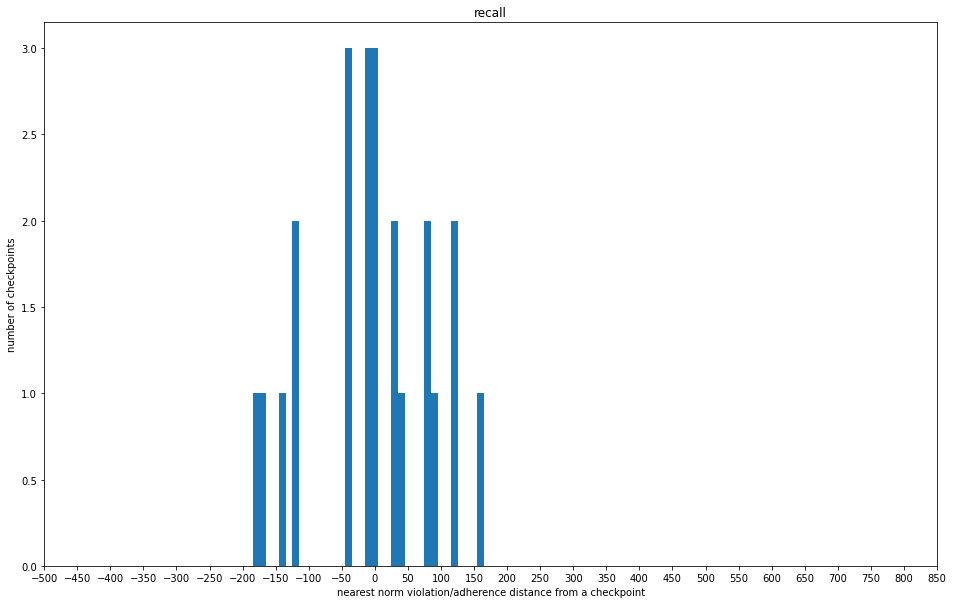

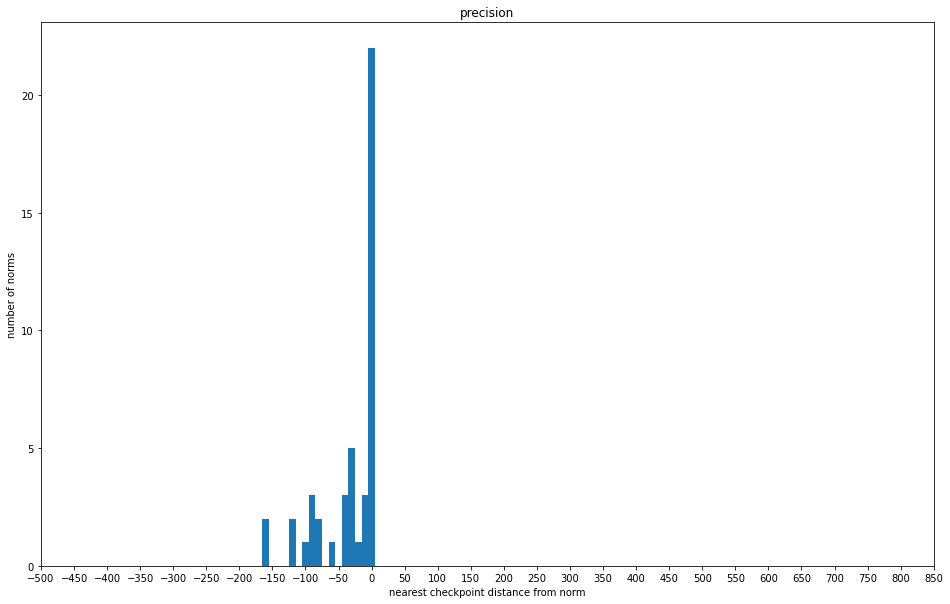

[0.2549019607843137, 0.3333333333333333, 0.35294117647058826, 0.35294117647058826, 0.39215686274509803, 0.39215686274509803, 0.39215686274509803, 0.39215686274509803, 0.43137254901960786, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.47058823529411764, 0.49019607843137253, 0.49019607843137253, 0.5098039215686274, 0.5882352941176471, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6274509803921569, 0.6470588235294118, 0.6470588235294118, 0.6666666666666666, 0.7058823529411765, 0.7058823529411765]
[0.4614838480653177, 0.5268050821196157, 0.4949133901567226, 0.4447739065974796, 0.4487323311644604, 0.41093075816724883, 0.37900322152738297, 0.3516792685071215, 0.3608331966540922, 0.3688335638543107, 0.3469712303021541, 0.327555616214003, 0.31019775106630476, 0.30686142138210387, 0.2921584667523665, 0.28995204639232747, 0.31993174789378265, 0.3269643404516195, 0.3138177895459449, 

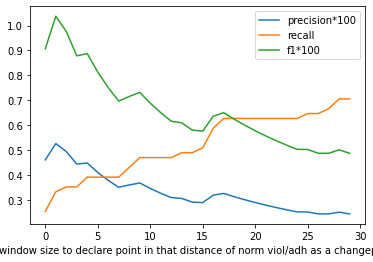

.psm.xml


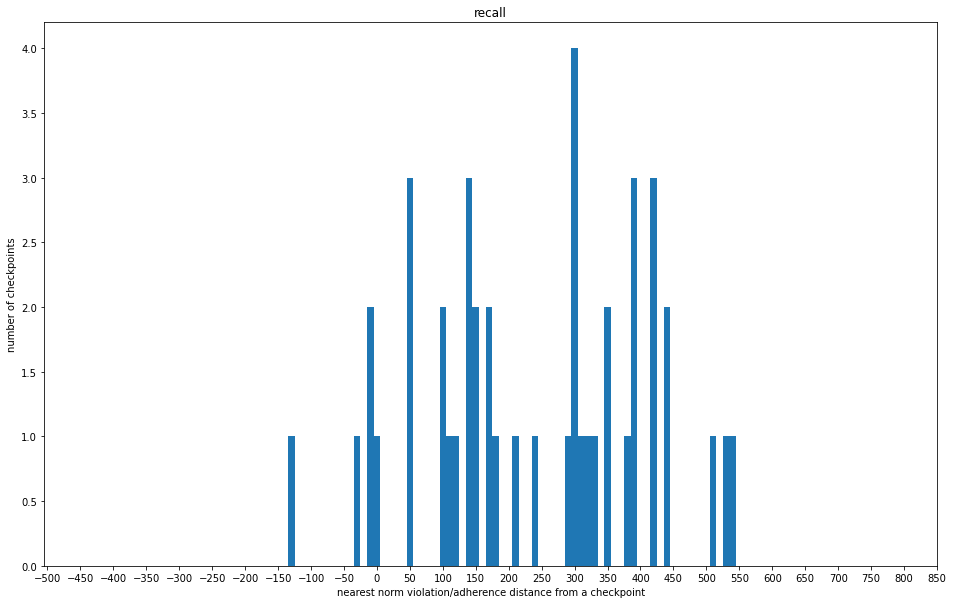

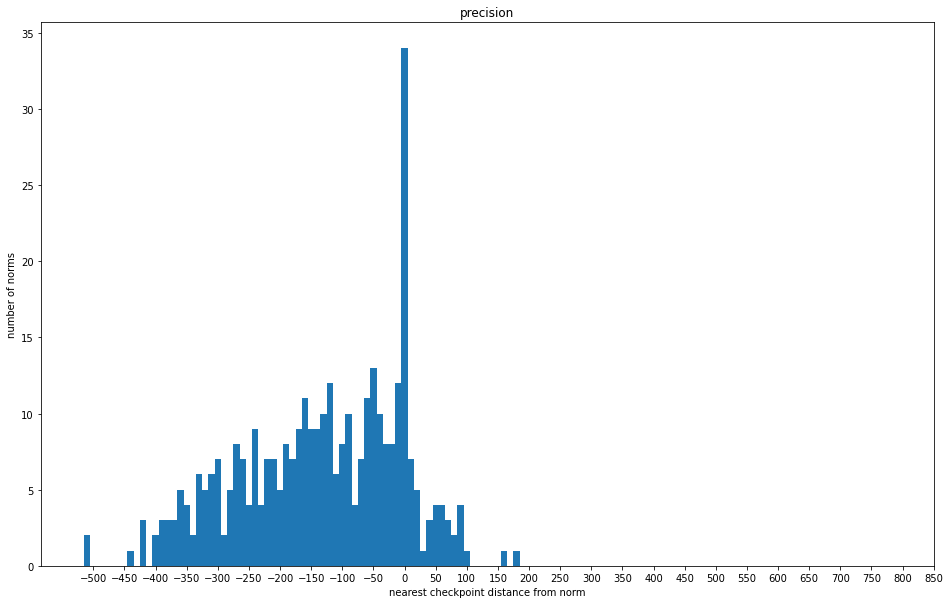

[0.21, 0.21, 0.21, 0.21, 0.43, 0.43, 0.44, 0.44, 0.47, 0.51, 0.6, 0.61, 0.65, 0.69, 0.7, 0.72, 0.77, 0.79, 0.83, 0.87, 0.87, 0.88, 0.94, 1.0, 1.01, 1.04, 1.07, 1.09, 1.12, 1.14]
[0.10083549409392106, 0.08574228319451249, 0.07457916045173663, 0.06598793363499246, 0.12116089039165961, 0.10981714168965165, 0.10275092242305356, 0.09464808122526243, 0.09371136898353072, 0.0947603121516165, 0.10437323870159691, 0.09975143903715332, 0.10028078620136383, 0.10075346066234449, 0.09702009702009702, 0.0949667616334283, 0.09687728039052868, 0.09501130514263723, 0.09560669938028428, 0.09615384615384616, 0.09240966158944618, 0.0899685110211426, 0.09263091507518871, 0.0951076618732405, 0.09282235088686701, 0.09246417013407304, 0.09212860119508877, 0.09097889957264957, 0.09070735539465799, 0.08966493629070316]
[0.20070725413361368, 0.1707872478854912, 0.14863047632528842, 0.1315624608445057, 0.2416409103680809, 0.21907479111473405, 0.20502306509482313, 0.18888984287799432, 0.18704978708162534, 0.189169

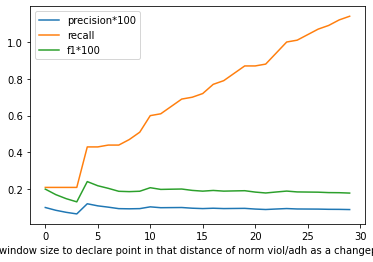

.mp4.ldcc


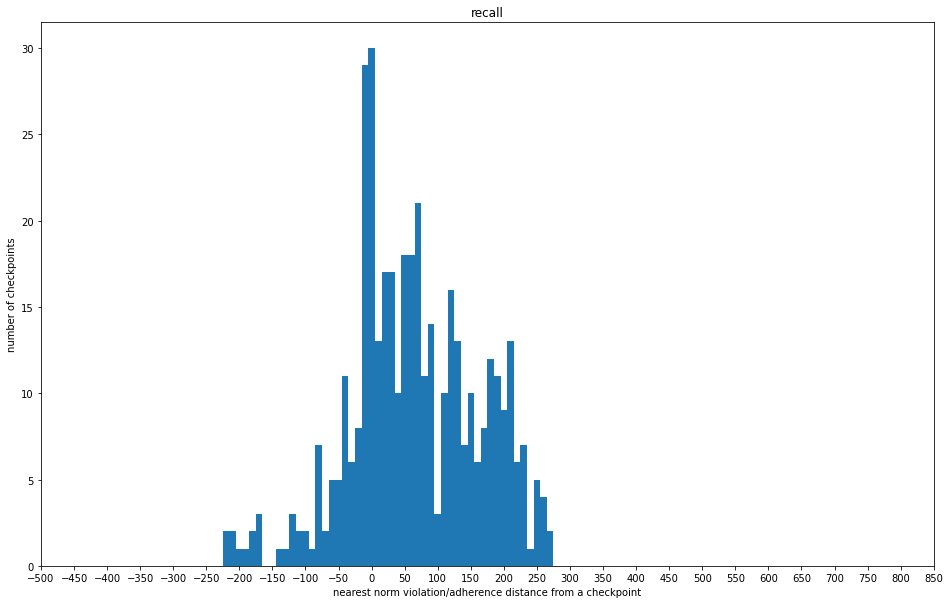

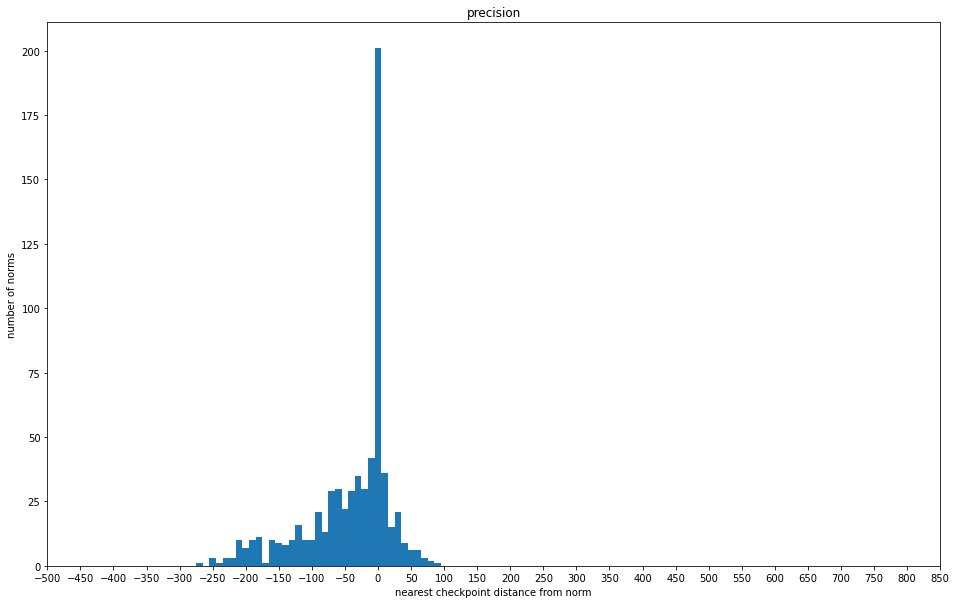

[0.22975929978118162, 0.2603938730853392, 0.28665207877461707, 0.32603938730853393, 0.3479212253829322, 0.3741794310722101, 0.40043763676148797, 0.437636761487965, 0.45076586433260396, 0.4660831509846827, 0.49452954048140046, 0.5229759299781181, 0.5448577680525164, 0.5733041575492341, 0.6017505470459519, 0.6280087527352297, 0.6630196936542669, 0.6958424507658644, 0.7264770240700219, 0.7439824945295405, 0.7702407002188184, 0.7986870897155361, 0.8205689277899344, 0.8512035010940919, 0.8818380743982495, 0.9015317286652079, 0.925601750547046, 0.9431072210065645, 0.9781181619256017, 1.0218818380743981]
[0.43138866064092024, 0.4282732311235874, 0.41944159836065575, 0.42966722417671144, 0.4170601196096947, 0.4113543420736108, 0.4065221254665008, 0.412694482274772, 0.39685597595746325, 0.3847960400332406, 0.3843537414965986, 0.38396041512707646, 0.3790415880168057, 0.37895224044664294, 0.3788713766119255, 0.3774825726686834, 0.38124716895666616, 0.383492921058344, 0.3844016302334198, 0.3785601

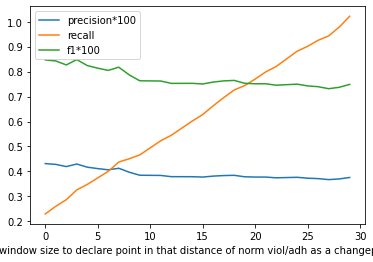

In [ ]:
for file_type in file_types:
  p = pd.read_csv("changepoint.tab", sep='\t', lineterminator='\n')
  p=p.drop(['impact_scalar','comment'],axis=1)
  change = {}
  df = p.reset_index()  
  for index, row in df.iterrows():
    if file_dict[row['file_id']]==file_type:
      if row['file_id'] not in change:
        change[row['file_id']] = [(row['timestamp'])]
      else:
        change[row['file_id']].append(row['timestamp'])

  seg = pd.read_csv("segments.tab", sep='\t', lineterminator='\n')
  file2seg = {}
  df = seg.reset_index()  
  for index, row in df.iterrows():
    if file_dict[row['file_id']]==file_type:
      if (row['file_id']) not in file2seg:
        file2seg[row['file_id']] = [(row['segment_id'])]
      else:
        file2seg[row['file_id']].append(row['segment_id'])

  segments = {}
  df = seg.reset_index()  
  for index, row in df.iterrows():
      segments[row['segment_id']]=[row['start'],row['end']]
      
  normsf = pd.read_csv("norms.tab", sep='\t', lineterminator='\n')
  norms = {}
  df = normsf.reset_index()  
  for index, row in df.iterrows():
    if(row['status']!='EMPTY_NA'):
      if file_dict[row['file_id']]==file_type:
        if row['file_id'] not in norms:
          norms[row['file_id']] = [segments[row['segment_id']]]
        else:
          norms[row['file_id']].append(segments[row['segment_id']])

  dic ={}
  for key in change:
    for change_time in change[key]:
      if key in norms:
        mini=1000
        for seg in norms[key]:
          val = seg[0]-change_time
          end = seg[1]-change_time
          if abs(end)<abs(val):
            val=end
          if abs(val)<abs(mini):
            mini=val
        p =int(math.floor(val/10)*10)
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0
  print(file_type)
  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.title('recall')
  plt.xlabel("nearest norm violation/adherence distance from a checkpoint")
  plt.ylabel("number of checkpoints")
  plt.xticks(np.arange(-500,900,step=50))
  plt.show()


  dic={}
    
  for key in norms:
    full=[]
    dist=[]
    ba=[]
    for nm in norms[key]:
      a=nm[0]
      b=nm[1]
      mid=(a+b)/2
      full.append((mid,b-mid,'n'))
    if key in change:
      for cp in change[key]:
        full.append((cp,'c'))
    full.sort(key=lambda a: a[0])
    cp = -1
    for  item in full:
      if(len(item)==2):
        cp=item[0]
      else:
        if cp==-1:
          dist.append(-1)
          ba.append('b')
        elif(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
          dist.append(0)
          ba.append('b')
        else:
          dist.append(abs(item[0]-item[1]-cp))
          ba.append('b')

    cp = -1
    i=len(dist)
    for item in full[::-1]:
      if(len(item)==2):
        cp=item[0]
      else:
        i-=1
        if cp!=-1:
          if(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
            dist[i]=0
          else:
            dist[i]=min(dist[i],abs(cp-item[0]-item[1]))
            ba[i]='a'
        

    for i in range(0,len(dist)):
      val=dist[i]
      if val!=-1:
        p =int(math.floor(val/10)*10)
        if ba[i]=='b':
          p=-p
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0

  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.xticks(np.arange(-500,900,step=50))
  plt.xlabel("nearest checkpoint distance from norm")
  plt.ylabel("number of norms")
  plt.title("precision")
  plt.show()

  dval =[]
  rec=[]
  prec=[]
  f1=[]

  for d in range(30):  
    dval.append(d)
    fpf=0
    tpf=0
    fnf=0
    for key in norms:
      fp=0
      tp=0
      fn=0
      changepoint =[ ]
      if key in change:
        changepoint = change[key]
      for nm in norms[key]:
        a=nm[0]
        b=nm[1]
        for p in range(math.ceil(a-d),math.floor(b+d)):
          if(p in changepoint):
            tp+=1
          else:
            fp+=1
      fn += len(changepoint)-tp
      fpf+=fp
      tpf+=tp
      fnf+=fn
      
  
    recall = tpf/(tpf+fnf)
    precision = tpf/(tpf+fpf)
    f1val=2*precision*recall/(precision+recall)
    f1.append(f1val*100)
    rec.append(recall)
    prec.append(precision*100)


  print(rec)
  print(prec)
  print(f1)
  plt.plot(dval,prec,label='precision*100')
  plt.plot(dval,rec,label='recall')
  plt.plot(dval,f1,label='f1*100')
  plt.xlabel("window size to declare point in that distance of norm viol/adh as a changepoint")
  plt.legend()
  plt.show()





norm status:
adhere


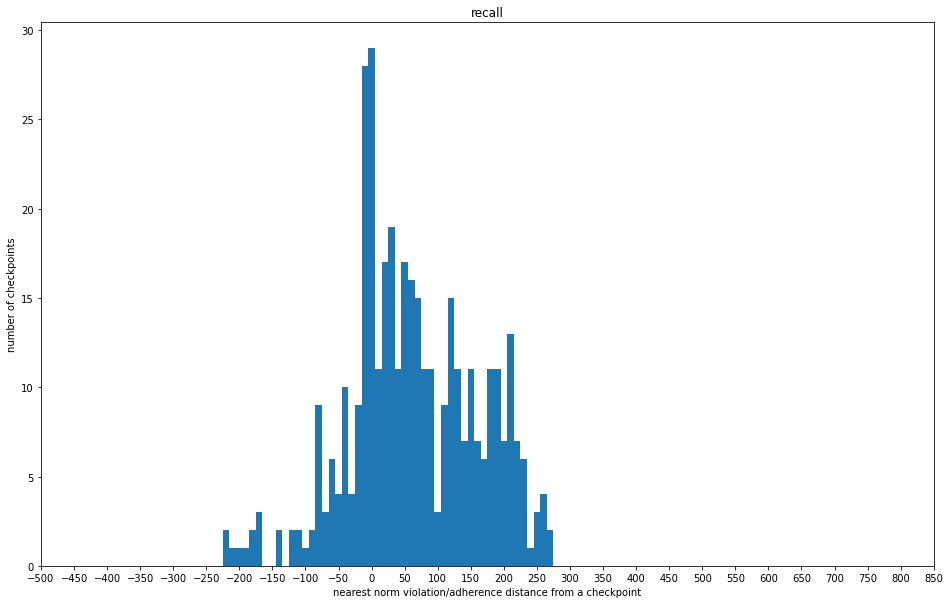

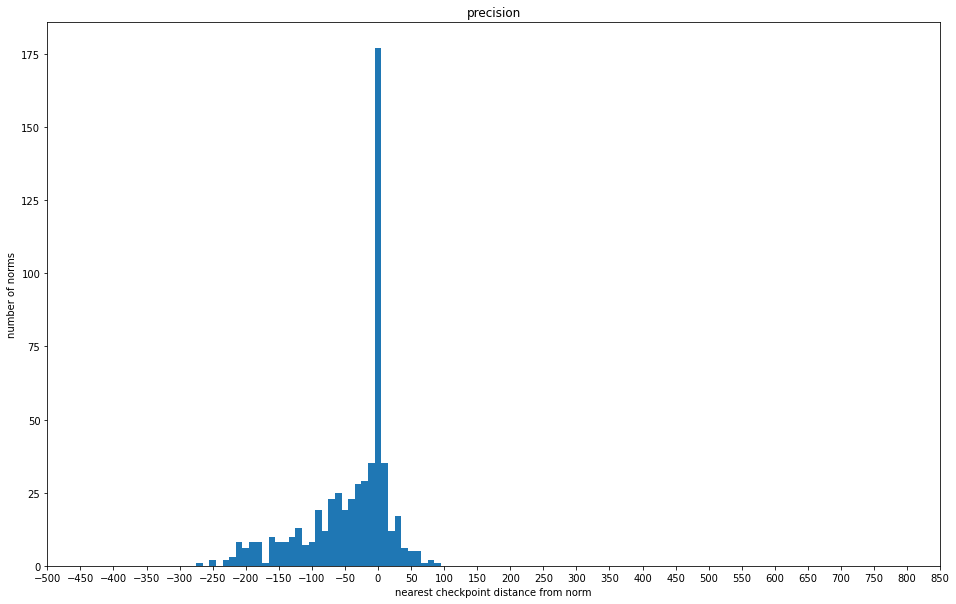

[0.21016166281755197, 0.23787528868360278, 0.2586605080831409, 0.3002309468822171, 0.3187066974595843, 0.3418013856812933, 0.3648960739030023, 0.4018475750577367, 0.41570438799076215, 0.42725173210161665, 0.45727482678983833, 0.48729792147806006, 0.5057736720554272, 0.5334872979214781, 0.5612009237875288, 0.581986143187067, 0.6143187066974596, 0.6420323325635104, 0.6720554272517321, 0.6905311778290993, 0.7182448036951501, 0.745958429561201, 0.766743648960739, 0.7944572748267898, 0.8267898383371824, 0.8475750577367206, 0.8729792147806005, 0.8868360277136259, 0.9145496535796767, 0.9584295612009238]
[0.4492939666238768, 0.44546319522532657, 0.43093497499038086, 0.450481668861321, 0.4349744688898695, 0.42781985315372606, 0.4217607175270941, 0.4314406149268535, 0.4166859576832261, 0.40159770763686886, 0.4046266399640332, 0.4073201806880043, 0.40058533016279496, 0.401473808613438, 0.40227791941197893, 0.39826785093403294, 0.40216503885579513, 0.4028401680915809, 0.4048526670191157, 0.4000214

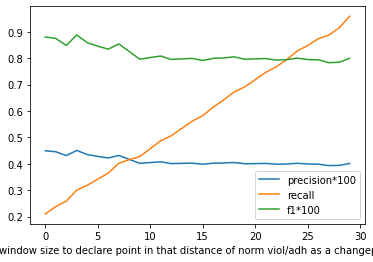

norm status:
violate


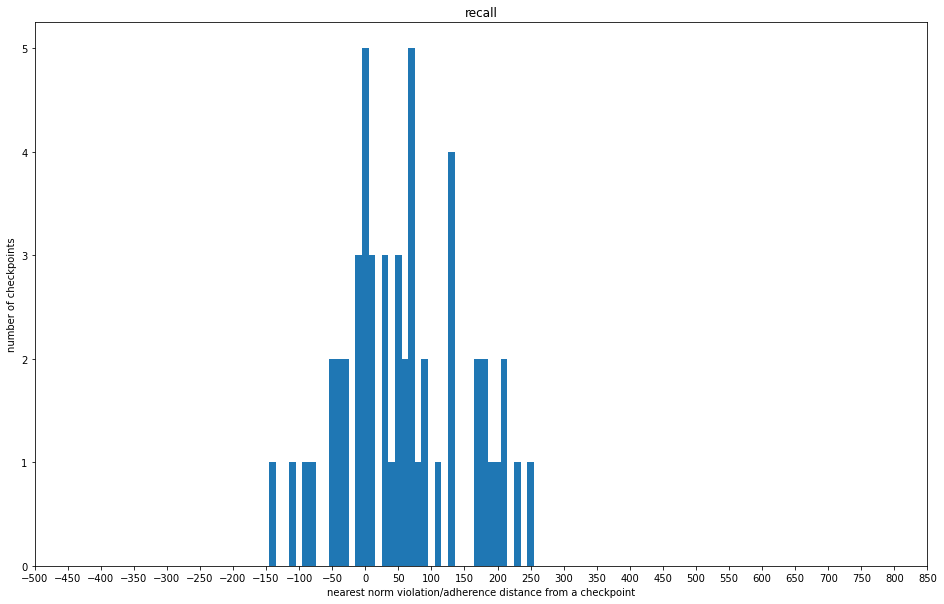

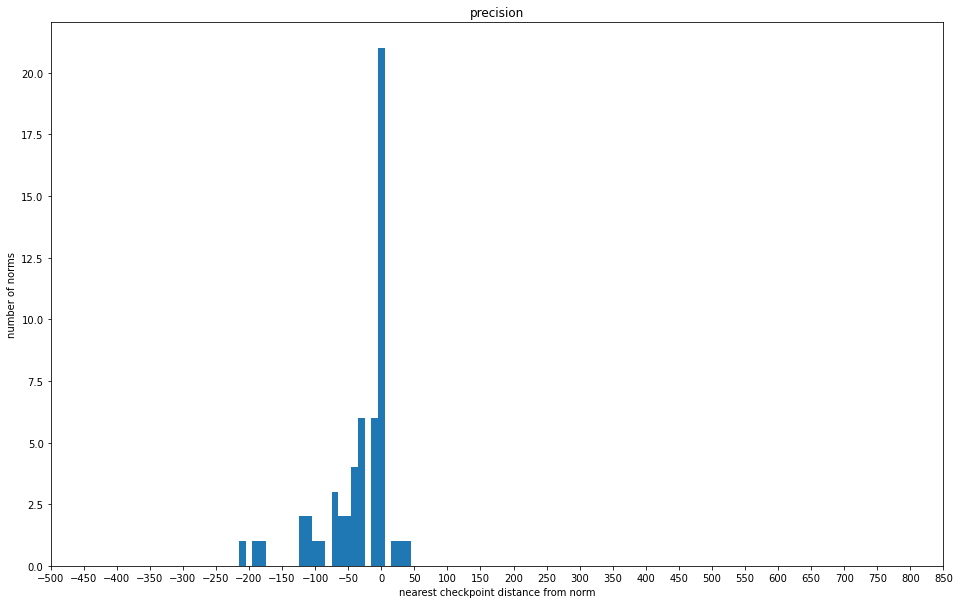

[0.15217391304347827, 0.17391304347826086, 0.20652173913043478, 0.20652173913043478, 0.22826086956521738, 0.25, 0.2717391304347826, 0.2717391304347826, 0.2717391304347826, 0.2826086956521739, 0.2826086956521739, 0.2826086956521739, 0.30434782608695654, 0.31521739130434784, 0.32608695652173914, 0.358695652173913, 0.3695652173913043, 0.40217391304347827, 0.41304347826086957, 0.41304347826086957, 0.41304347826086957, 0.41304347826086957, 0.42391304347826086, 0.44565217391304346, 0.44565217391304346, 0.44565217391304346, 0.44565217391304346, 0.4673913043478261, 0.4891304347826087, 0.5]
[0.4360012457178449, 0.43656207366984995, 0.46127700898276286, 0.41548217800131204, 0.41774418142033026, 0.4196314541142127, 0.42122999157540014, 0.39129754265143213, 0.3653368405670028, 0.3563108126627381, 0.3354405883111857, 0.3168799512492383, 0.32336297493936944, 0.31822670909689454, 0.31357792411414237, 0.3293084522502744, 0.32458233890214794, 0.3385488150791472, 0.3338311517174734, 0.32102728731942215,

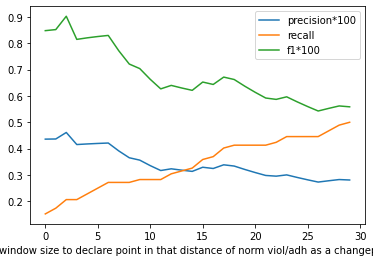

In [ ]:
for status in ['adhere','violate']:
  p = pd.read_csv("changepoint.tab", sep='\t', lineterminator='\n')
  p=p.drop(['impact_scalar','comment'],axis=1)
  change = {}
  df = p.reset_index()  
  for index, row in df.iterrows():
    if row['file_id'] not in change:
       change[row['file_id']] = [(row['timestamp'])]
    else:
      change[row['file_id']].append(row['timestamp'])

  seg = pd.read_csv("segments.tab", sep='\t', lineterminator='\n')
  file2seg = {}
  df = seg.reset_index()  
  for index, row in df.iterrows():
    if (row['file_id']) not in file2seg:
      file2seg[row['file_id']] = [(row['segment_id'])]
    else:
      file2seg[row['file_id']].append(row['segment_id'])

  segments = {}
  df = seg.reset_index()  
  for index, row in df.iterrows():
      segments[row['segment_id']]=[row['start'],row['end']]
      
  normsf = pd.read_csv("norms.tab", sep='\t', lineterminator='\n')
  norms = {}
  df = normsf.reset_index()  
  for index, row in df.iterrows():
    if(row['status']==status):
      if file_dict[row['file_id']]==file_type:
        if row['file_id'] not in norms:
          norms[row['file_id']] = [segments[row['segment_id']]]
        else:
          norms[row['file_id']].append(segments[row['segment_id']])

  dic ={}
  for key in change:
    for change_time in change[key]:
      if key in norms:
        mini=1000
        for seg in norms[key]:
          val = seg[0]-change_time
          end = seg[1]-change_time
          if abs(end)<abs(val):
            val=end
          if abs(val)<abs(mini):
            mini=val
        p =int(math.floor(val/10)*10)
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0
  print("norm status:")
  print(status)
  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.title('recall')
  plt.xlabel("nearest norm violation/adherence distance from a checkpoint")
  plt.ylabel("number of checkpoints")
  plt.xticks(np.arange(-500,900,step=50))
  plt.show()


  dic={}
    
  for key in norms:
    full=[]
    dist=[]
    ba=[]
    for nm in norms[key]:
      a=nm[0]
      b=nm[1]
      mid=(a+b)/2
      full.append((mid,b-mid,'n'))
    if key in change:
      for cp in change[key]:
        full.append((cp,'c'))
    full.sort(key=lambda a: a[0])
    cp = -1
    for  item in full:
      if(len(item)==2):
        cp=item[0]
      else:
        if cp==-1:
          dist.append(-1)
          ba.append('b')
        elif(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
          dist.append(0)
          ba.append('b')
        else:
          dist.append(abs(item[0]-item[1]-cp))
          ba.append('b')

    cp = -1
    i=len(dist)
    for item in full[::-1]:
      if(len(item)==2):
        cp=item[0]
      else:
        i-=1
        if cp!=-1:
          if(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
            dist[i]=0
          else:
            dist[i]=min(dist[i],abs(cp-item[0]-item[1]))
            ba[i]='a'
        

    for i in range(0,len(dist)):
      val=dist[i]
      if val!=-1:
        p =int(math.floor(val/10)*10)
        if ba[i]=='b':
          p=-p
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0

  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.xticks(np.arange(-500,900,step=50))
  plt.xlabel("nearest checkpoint distance from norm")
  plt.ylabel("number of norms")
  plt.title("precision")
  plt.show()

  dval =[]
  rec=[]
  prec=[]
  f1=[]

  for d in range(30):  
    dval.append(d)
    fpf=0
    tpf=0
    fnf=0
    for key in norms:
      fp=0
      tp=0
      fn=0
      changepoint =[ ]
      if key in change:
        changepoint = change[key]
      for nm in norms[key]:
        a=nm[0]
        b=nm[1]
        for p in range(math.ceil(a-d),math.floor(b+d)):
          if(p in changepoint):
            tp+=1
          else:
            fp+=1
      fn += len(changepoint)-tp
      fpf+=fp
      tpf+=tp
      fnf+=fn
      
  
    recall = tpf/(tpf+fnf)
    precision = tpf/(tpf+fpf)
    f1val=2*precision*recall/(precision+recall)
    f1.append(f1val*100)
    rec.append(recall)
    prec.append(precision*100)


  print(rec)
  print(prec)
  print(f1)
  plt.plot(dval,prec,label='precision*100')
  plt.plot(dval,rec,label='recall')
  plt.plot(dval,f1,label='f1*100')
  plt.xlabel("window size to declare point in that distance of norm viol/adh as a changepoint")
  plt.legend()
  plt.show()





In [ ]:
normsf = pd.read_csv("norms.tab", sep='\t', lineterminator='\n')
norm_types = [] 
df = normsf.reset_index()  
for index, row in df.iterrows():
  if row["norm"] not in norm_types:
    norm_types.append(row["norm"])

In [ ]:
norm_dict = {
    '101':'apology',
    '102':'criticism',
    '103':'greeting',
    '104':'request',
    '105':'persuasion',
    '106':'thanks',
    '107':'leave'
}
norm_dict

{'101': 'apology',
 '102': 'criticism',
 '103': 'greeting',
 '104': 'request',
 '105': 'persuasion',
 '106': 'thanks',
 '107': 'leave'}

In [ ]:
norm_types

['none', '106', '102', '105', 'noann', '104', '107', '103', '101']

In [ ]:
norm_types.remove('none')
norm_types.remove('noann')



norm type:
106
thanks


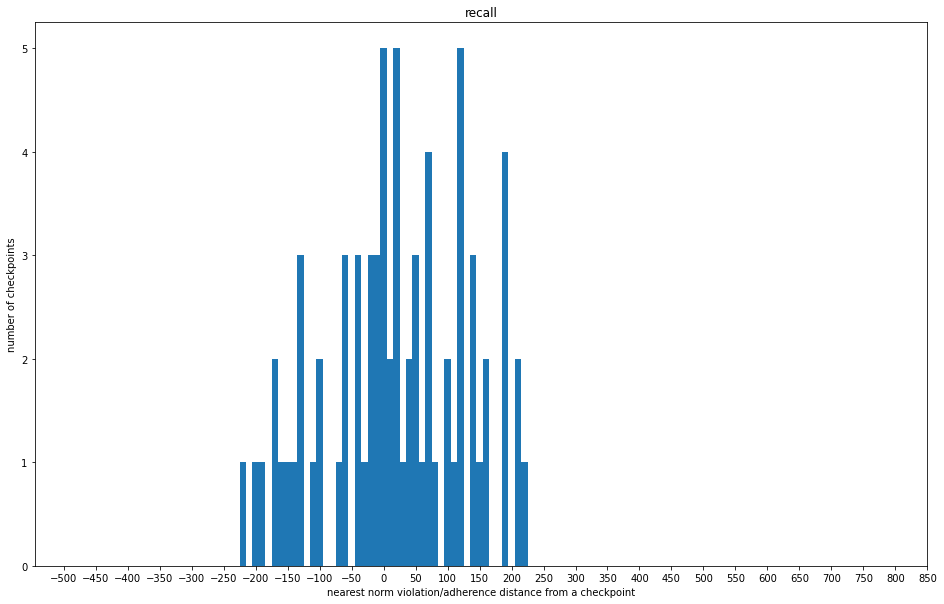

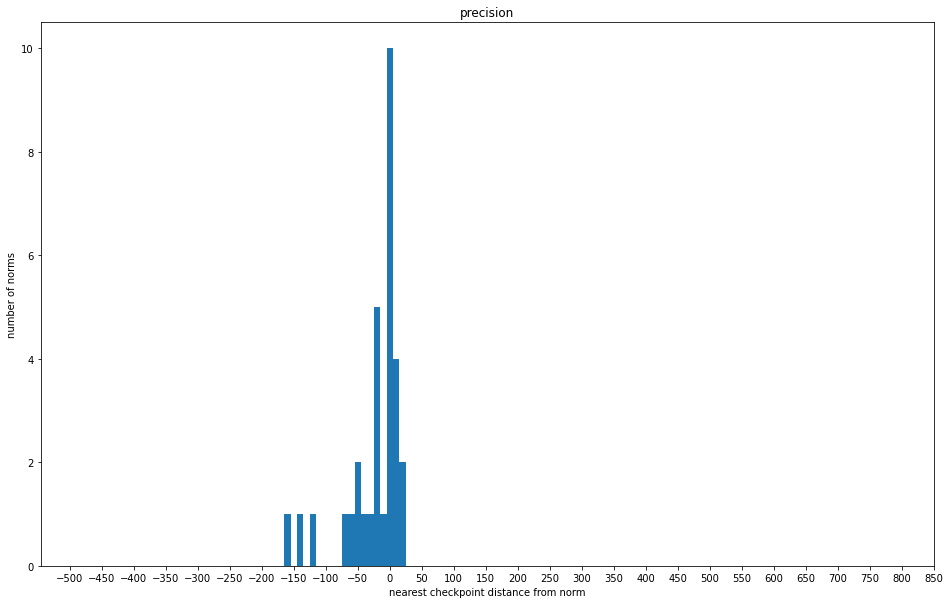

[0.04878048780487805, 0.056910569105691054, 0.07317073170731707, 0.07317073170731707, 0.08130081300813008, 0.08130081300813008, 0.08943089430894309, 0.08943089430894309, 0.08943089430894309, 0.0975609756097561, 0.10569105691056911, 0.10569105691056911, 0.10569105691056911, 0.12195121951219512, 0.13821138211382114, 0.13821138211382114, 0.15447154471544716, 0.16260162601626016, 0.17886178861788618, 0.17886178861788618, 0.17886178861788618, 0.18699186991869918, 0.18699186991869918, 0.2032520325203252, 0.21951219512195122, 0.22764227642276422, 0.23577235772357724, 0.24390243902439024, 0.2601626016260163, 0.2682926829268293]
[0.29055690072639223, 0.2932551319648094, 0.33222591362126247, 0.29693170570768723, 0.29824038174768863, 0.27210884353741494, 0.2752064048036027, 0.25468858532067606, 0.2370178840767076, 0.24178924037880312, 0.24597918637653737, 0.2318530408418049, 0.21926125822229717, 0.23996160614301712, 0.2586338049596835, 0.24655547498187094, 0.263267285575724, 0.26528717336516777, 

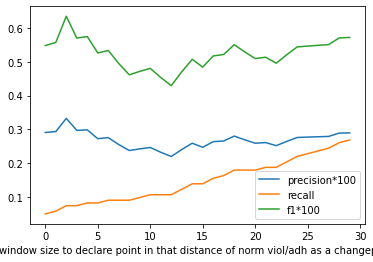

norm type:
102
criticism


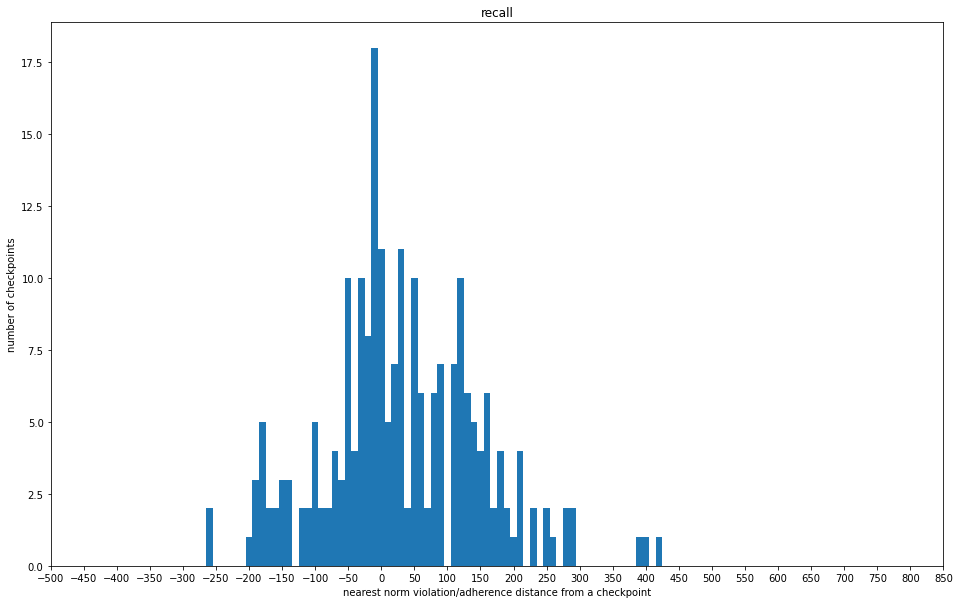

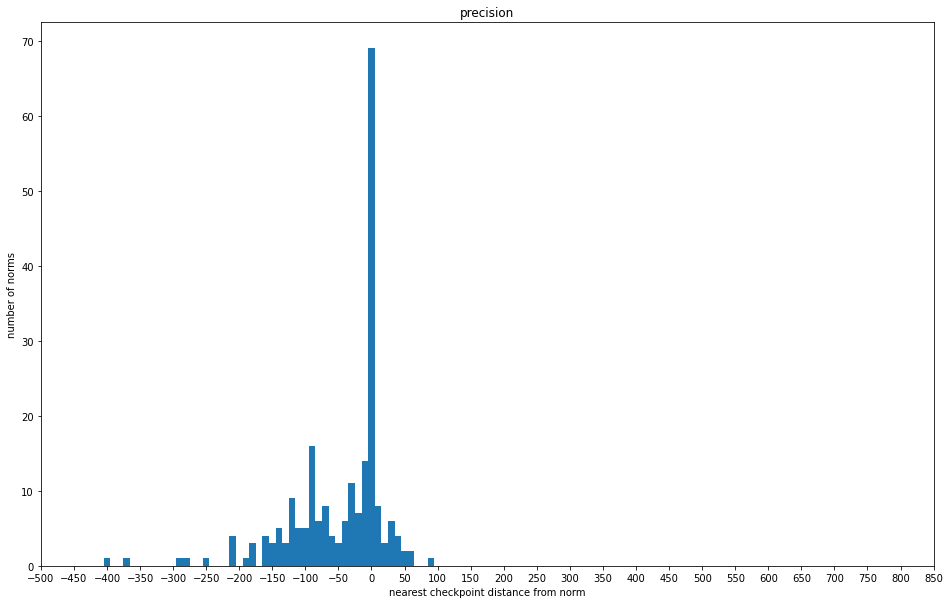

[0.12982456140350876, 0.15087719298245614, 0.16140350877192983, 0.17894736842105263, 0.19649122807017544, 0.20701754385964913, 0.22456140350877193, 0.23859649122807017, 0.24912280701754386, 0.2631578947368421, 0.2736842105263158, 0.2771929824561403, 0.28421052631578947, 0.2982456140350877, 0.30526315789473685, 0.32280701754385965, 0.3508771929824561, 0.3719298245614035, 0.3929824561403509, 0.4070175438596491, 0.41754385964912283, 0.4245614035087719, 0.43859649122807015, 0.45964912280701753, 0.4666666666666667, 0.47368421052631576, 0.48771929824561405, 0.49122807017543857, 0.5157894736842106, 0.5263157894736842]
[0.3793315562846012, 0.3838600249955365, 0.36363636363636365, 0.3617534402042843, 0.36022127878553967, 0.34718135812639755, 0.3470339442576727, 0.3418803418803419, 0.3327397131877402, 0.3291494777494953, 0.3218618469918296, 0.30760844171014723, 0.29856247696277183, 0.29743159073413117, 0.2897488843002731, 0.2923047594840186, 0.3037482534475427, 0.30840849578120455, 0.31269194259

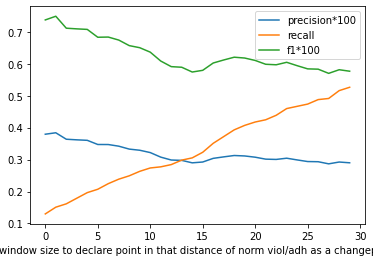

norm type:
105
persuasion


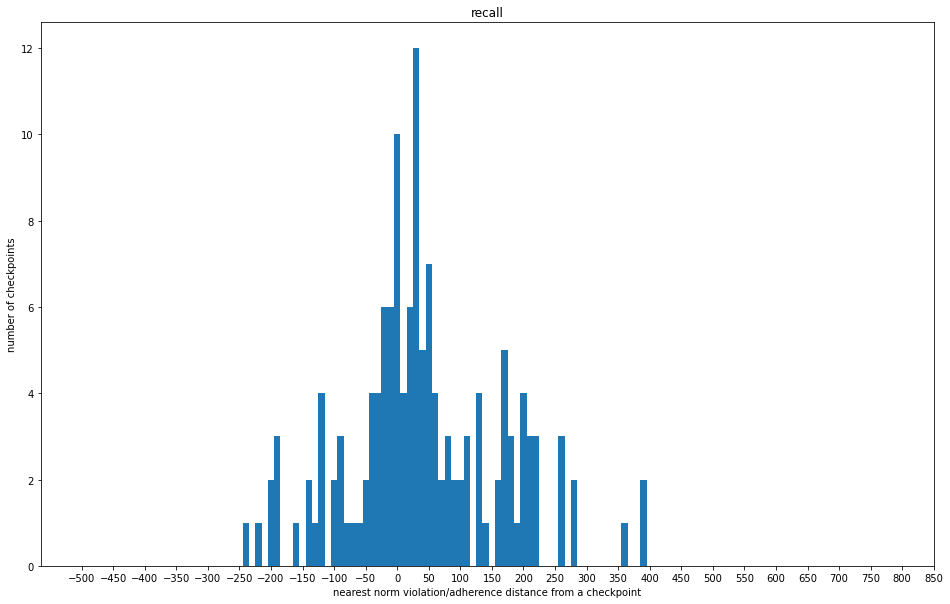

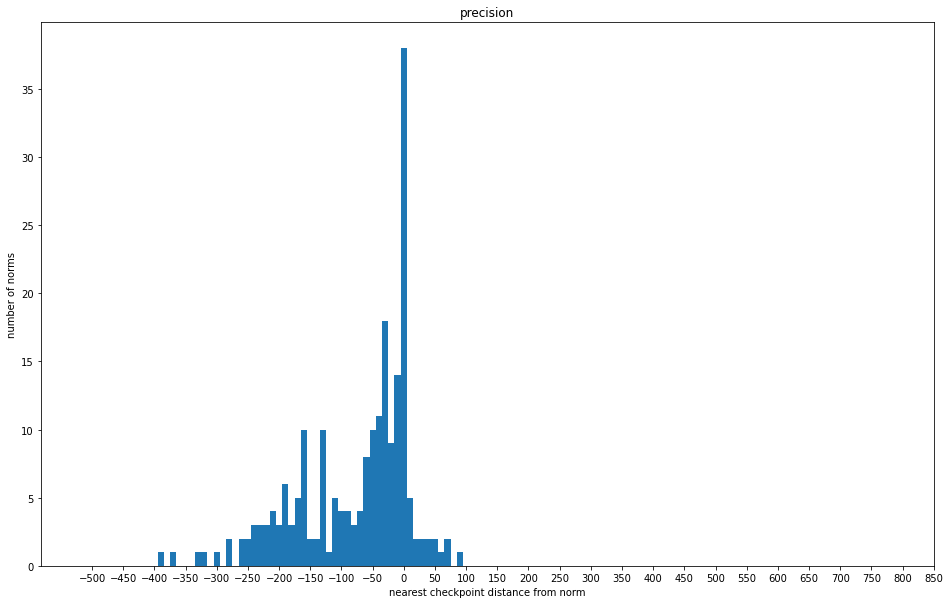

[0.08737864077669903, 0.0970873786407767, 0.10194174757281553, 0.14563106796116504, 0.1650485436893204, 0.1796116504854369, 0.18446601941747573, 0.19902912621359223, 0.21359223300970873, 0.22815533980582525, 0.23786407766990292, 0.24271844660194175, 0.2669902912621359, 0.28640776699029125, 0.2961165048543689, 0.3058252427184466, 0.32038834951456313, 0.33495145631067963, 0.3592233009708738, 0.3737864077669903, 0.3932038834951456, 0.4174757281553398, 0.441747572815534, 0.44660194174757284, 0.4563106796116505, 0.46601941747572817, 0.4854368932038835, 0.5097087378640777, 0.5194174757281553, 0.5485436893203883]
[0.1492908683752177, 0.1462095182396374, 0.137245931638455, 0.17727353306151392, 0.18333782690752226, 0.1834680418505479, 0.17439992656845196, 0.17513134851138354, 0.17576798625813927, 0.17632714312511724, 0.1732857092336528, 0.16722967323321852, 0.1744868500364836, 0.17801647406692211, 0.17546382856321013, 0.17313875834776157, 0.1736430845326107, 0.17410612904039766, 0.1793808935107

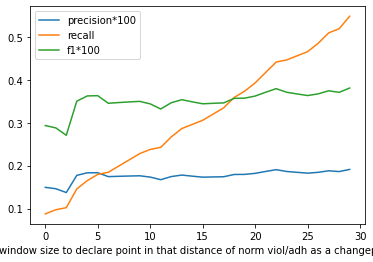

norm type:
104
request


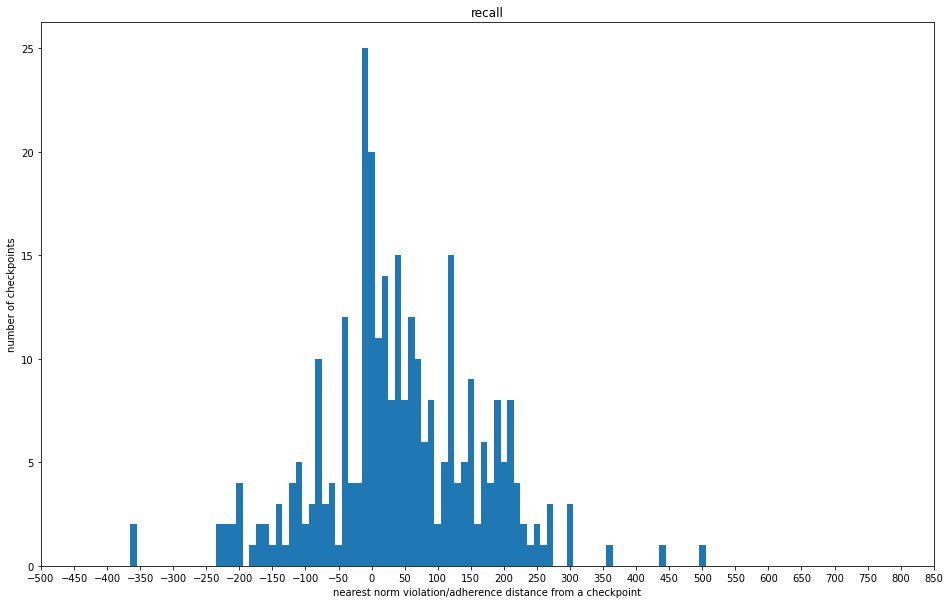

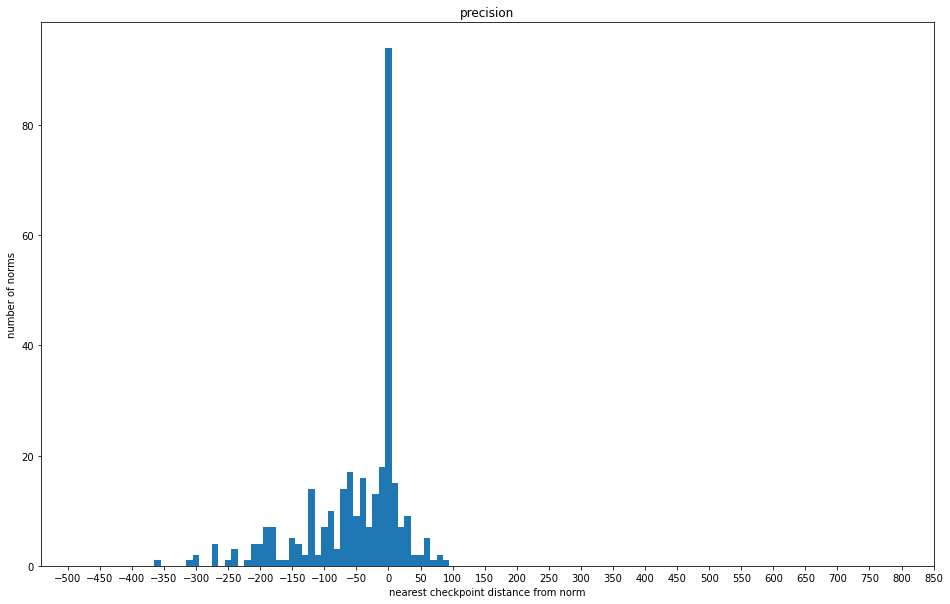

[0.15363881401617252, 0.16172506738544473, 0.1778975741239892, 0.18328840970350405, 0.20485175202156333, 0.2210242587601078, 0.23450134770889489, 0.2560646900269542, 0.2695417789757412, 0.2776280323450135, 0.29649595687331537, 0.32075471698113206, 0.33153638814016173, 0.3450134770889488, 0.3638814016172507, 0.38274932614555257, 0.3935309973045822, 0.41509433962264153, 0.42587601078167114, 0.4339622641509434, 0.4474393530997305, 0.4582210242587601, 0.4716981132075472, 0.48517520215633425, 0.5067385444743935, 0.5202156334231806, 0.5309973045822103, 0.5390835579514824, 0.555256064690027, 0.5822102425876011]
[0.35113657364627615, 0.3235722375020223, 0.3165012228456337, 0.2935716444329318, 0.29835512110862483, 0.29514451283158766, 0.2891037782873094, 0.29318272999413636, 0.28807651312188515, 0.2782054398617076, 0.27966338697785575, 0.28576231299378047, 0.2798443792232612, 0.27667898752783004, 0.27793218454697055, 0.27907159562132733, 0.2744722049893783, 0.2774624795056123, 0.273294933665438

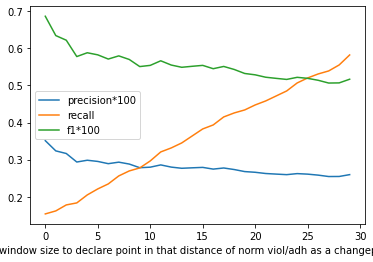

norm type:
107
leave


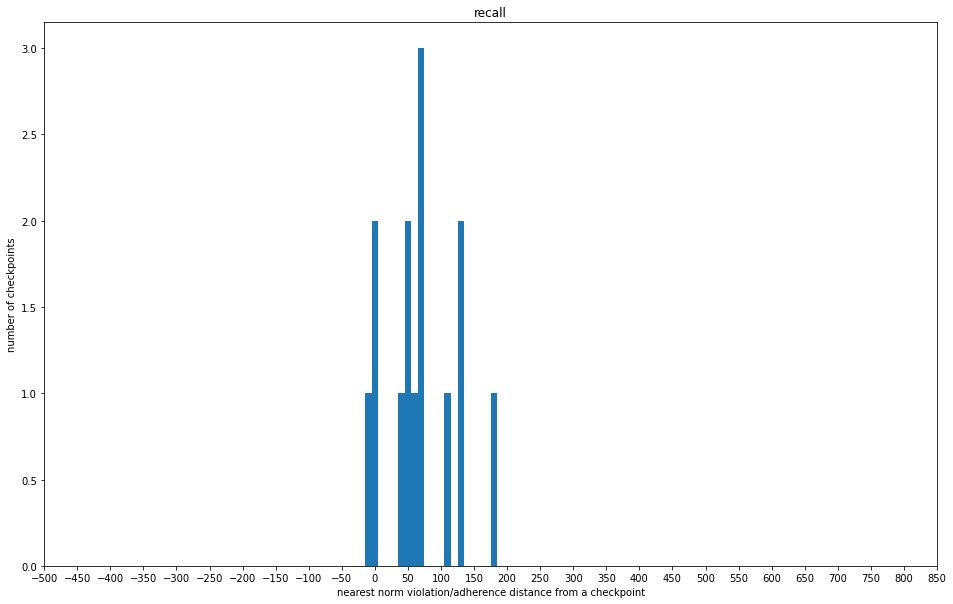

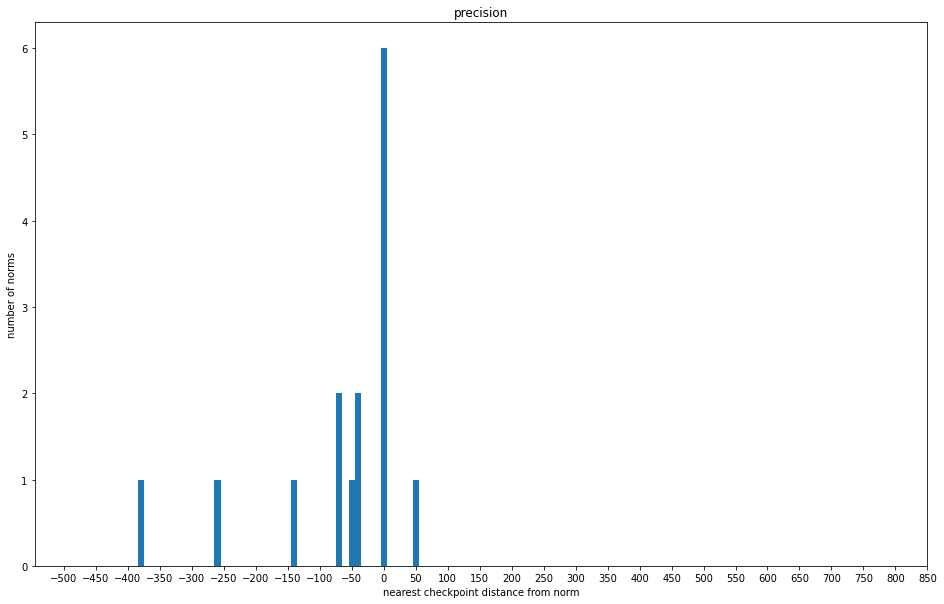

[0.0851063829787234, 0.10638297872340426, 0.10638297872340426, 0.10638297872340426, 0.14893617021276595, 0.14893617021276595, 0.14893617021276595, 0.1702127659574468, 0.1702127659574468, 0.1702127659574468, 0.19148936170212766, 0.19148936170212766, 0.19148936170212766, 0.2127659574468085, 0.2127659574468085, 0.2127659574468085, 0.2127659574468085, 0.23404255319148937, 0.23404255319148937, 0.23404255319148937, 0.23404255319148937, 0.23404255319148937, 0.23404255319148937, 0.23404255319148937, 0.23404255319148937, 0.23404255319148937, 0.2553191489361702, 0.2553191489361702, 0.2553191489361702, 0.2978723404255319]
[0.3527336860670194, 0.38580246913580246, 0.3429355281207133, 0.30864197530864196, 0.3928170594837262, 0.360082304526749, 0.33238366571699907, 0.3527336860670194, 0.3292181069958848, 0.30864197530864196, 0.32679738562091504, 0.30864197530864196, 0.29239766081871343, 0.30864197530864196, 0.29394473838918284, 0.28058361391694725, 0.2683843263553409, 0.2829218106995885, 0.271604938

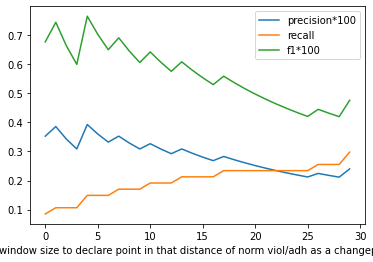

norm type:
103
greeting


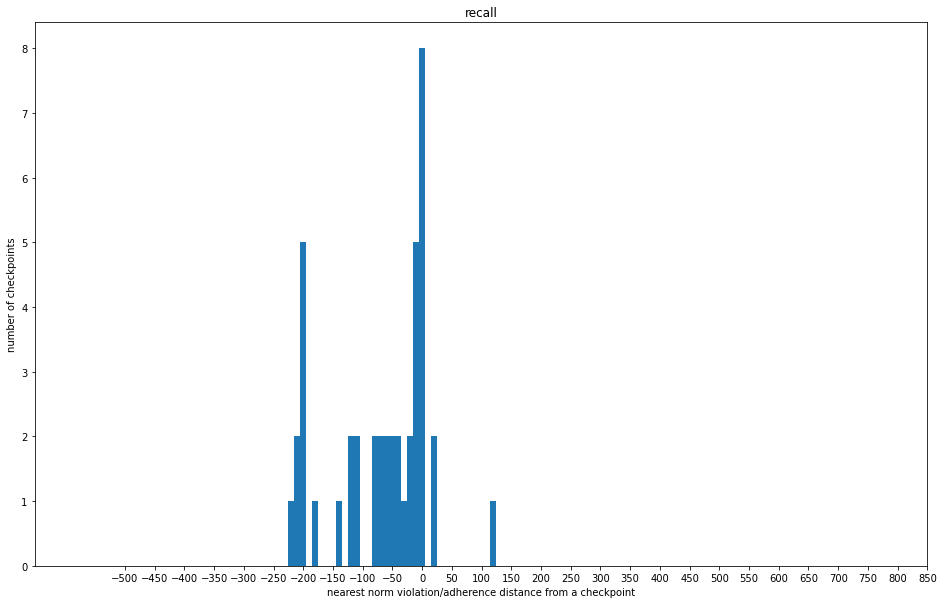

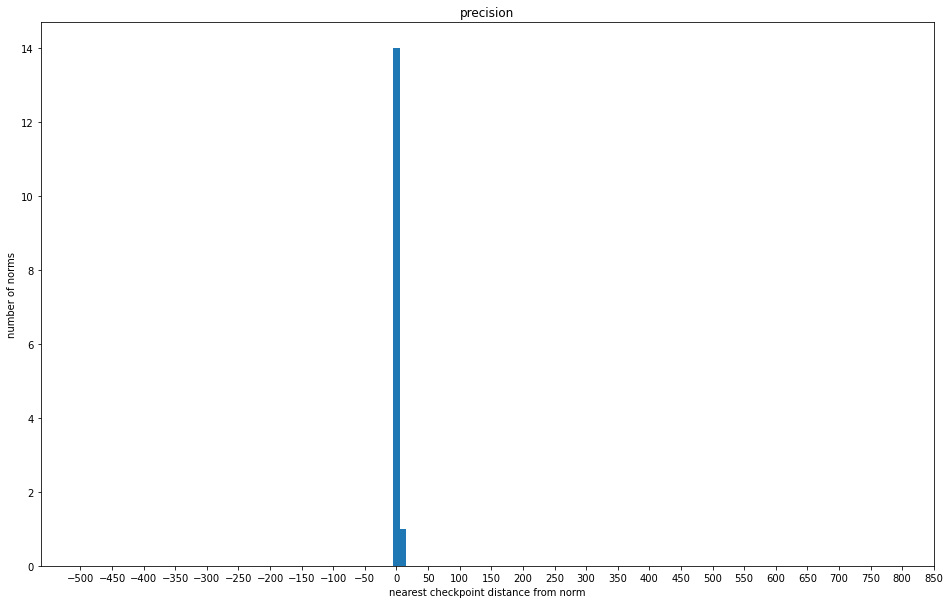

[0.1111111111111111, 0.14814814814814814, 0.14814814814814814, 0.16049382716049382, 0.1728395061728395, 0.1728395061728395, 0.18518518518518517, 0.18518518518518517, 0.18518518518518517, 0.18518518518518517, 0.18518518518518517, 0.19753086419753085, 0.20987654320987653, 0.2222222222222222, 0.2345679012345679, 0.2345679012345679, 0.24691358024691357, 0.24691358024691357, 0.24691358024691357, 0.24691358024691357, 0.24691358024691357, 0.24691358024691357, 0.24691358024691357, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.30864197530864196, 0.30864197530864196]
[0.7785467128027681, 0.881057268722467, 0.7653061224489796, 0.7328072153325818, 0.7070707070707071, 0.6404391582799633, 0.6270903010033445, 0.5773672055427251, 0.5349500713266762, 0.4983388704318937, 0.46641791044776115, 0.46756282875511396, 0.4685777287761852, 0.4694835680751174, 0.47029702970297027, 0.4474799811587376, 0.44923629829290207, 0.42936882782310004, 0.4111842105263

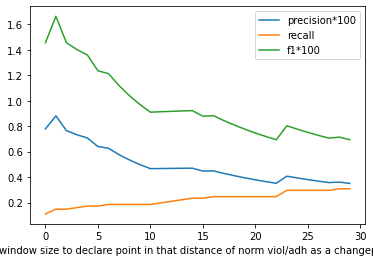

norm type:
101
apology


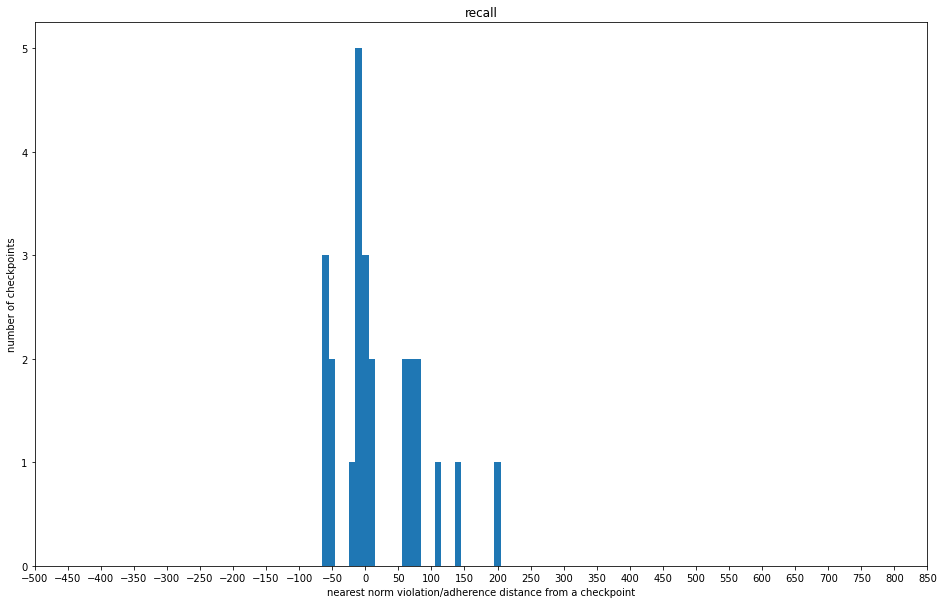

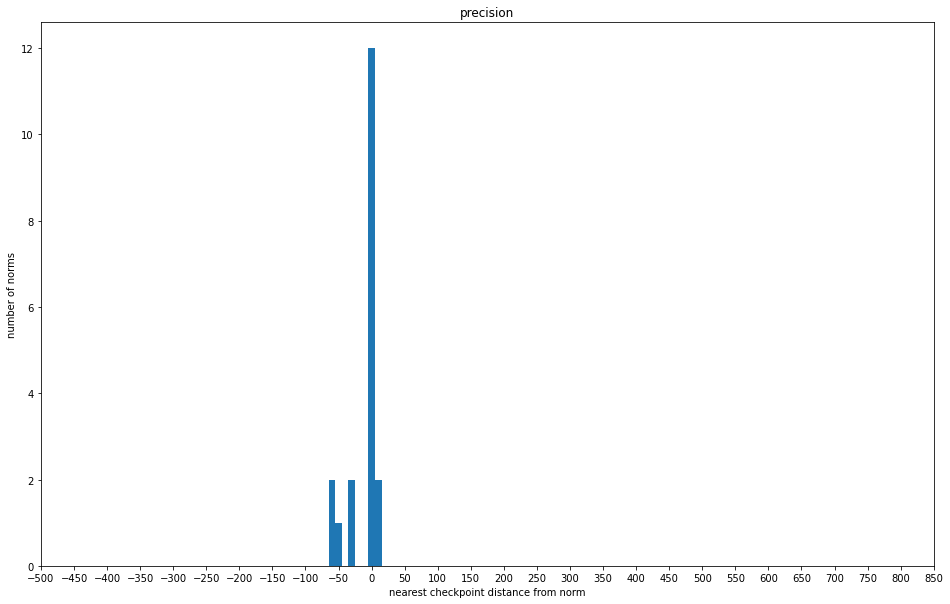

[0.1320754716981132, 0.16981132075471697, 0.18867924528301888, 0.20754716981132076, 0.24528301886792453, 0.24528301886792453, 0.24528301886792453, 0.24528301886792453, 0.24528301886792453, 0.24528301886792453, 0.2641509433962264, 0.2830188679245283, 0.2830188679245283, 0.2830188679245283, 0.2830188679245283, 0.2830188679245283, 0.32075471698113206, 0.32075471698113206, 0.32075471698113206, 0.33962264150943394, 0.33962264150943394, 0.3584905660377358, 0.37735849056603776, 0.37735849056603776, 0.37735849056603776, 0.37735849056603776, 0.37735849056603776, 0.37735849056603776, 0.37735849056603776, 0.37735849056603776]
[0.8073817762399077, 0.9174311926605505, 0.91324200913242, 0.9098428453267163, 0.9826152683295541, 0.9046624913013221, 0.8381689232753062, 0.7807807807807807, 0.7307476110174256, 0.6867406233491812, 0.6975585450921774, 0.7072135785007072, 0.6711409395973155, 0.6385696040868455, 0.6090133982947624, 0.5820721769499418, 0.63173541434411, 0.6060606060606061, 0.5823912298732443, 

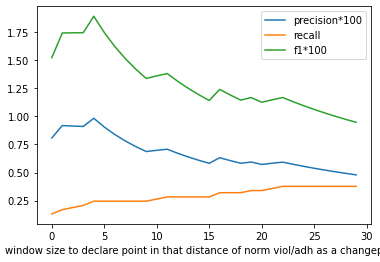

In [ ]:
for norm_type in norm_types:
  p = pd.read_csv("changepoint.tab", sep='\t', lineterminator='\n')
  p=p.drop(['impact_scalar','comment'],axis=1)
  change = {}
  df = p.reset_index()  
  for index, row in df.iterrows():
    if row['file_id'] not in change:
       change[row['file_id']] = [(row['timestamp'])]
    else:
      change[row['file_id']].append(row['timestamp'])

  seg = pd.read_csv("segments.tab", sep='\t', lineterminator='\n')
  file2seg = {}
  df = seg.reset_index()  
  for index, row in df.iterrows():
    if (row['file_id']) not in file2seg:
      file2seg[row['file_id']] = [(row['segment_id'])]
    else:
      file2seg[row['file_id']].append(row['segment_id'])

  segments = {}
  df = seg.reset_index()  
  for index, row in df.iterrows():
      segments[row['segment_id']]=[row['start'],row['end']]
      
  normsf = pd.read_csv("norms.tab", sep='\t', lineterminator='\n')
  norms = {}
  df = normsf.reset_index()  
  for index, row in df.iterrows():
    if(row['norm']==norm_type):
      if row['file_id'] not in norms:
        norms[row['file_id']] = [segments[row['segment_id']]]
      else:
        norms[row['file_id']].append(segments[row['segment_id']])

  dic ={}
  for key in change:
    for change_time in change[key]:
      if key in norms:
        mini=1000
        for seg in norms[key]:
          val = seg[0]-change_time
          end = seg[1]-change_time
          if abs(end)<abs(val):
            val=end
          if abs(val)<abs(mini):
            mini=val
        p =int(math.floor(val/10)*10)
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0
  print("norm type:")
  print(norm_type)
  print(norm_dict[norm_type])
  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.title('recall')
  plt.xlabel("nearest norm violation/adherence distance from a checkpoint")
  plt.ylabel("number of checkpoints")
  plt.xticks(np.arange(-500,900,step=50))
  plt.show()


  dic={}
    
  for key in norms:
    full=[]
    dist=[]
    ba=[]
    for nm in norms[key]:
      a=nm[0]
      b=nm[1]
      mid=(a+b)/2
      full.append((mid,b-mid,'n'))
    if key in change:
      for cp in change[key]:
        full.append((cp,'c'))
    full.sort(key=lambda a: a[0])
    cp = -1
    for  item in full:
      if(len(item)==2):
        cp=item[0]
      else:
        if cp==-1:
          dist.append(-1)
          ba.append('b')
        elif(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
          dist.append(0)
          ba.append('b')
        else:
          dist.append(abs(item[0]-item[1]-cp))
          ba.append('b')

    cp = -1
    i=len(dist)
    for item in full[::-1]:
      if(len(item)==2):
        cp=item[0]
      else:
        i-=1
        if cp!=-1:
          if(item[0]+item[1]>=cp and item[0]-item[1]<=cp):
            dist[i]=0
          else:
            dist[i]=min(dist[i],abs(cp-item[0]-item[1]))
            ba[i]='a'
        

    for i in range(0,len(dist)):
      val=dist[i]
      if val!=-1:
        p =int(math.floor(val/10)*10)
        if ba[i]=='b':
          p=-p
        if p in dic:
          dic[p]+=1
        else:
          dic[p]=0

  x=list(dic.keys())
  fig,ax = plt.subplots(figsize=(16,10))
  ax.bar(x,list(dic.values()),width=10)
  plt.xticks(np.arange(-500,900,step=50))
  plt.xlabel("nearest checkpoint distance from norm")
  plt.ylabel("number of norms")
  plt.title("precision")
  plt.show()

  dval =[]
  rec=[]
  prec=[]
  f1=[]

  for d in range(30):  
    dval.append(d)
    fpf=0
    tpf=0
    fnf=0
    for key in norms:
      fp=0
      tp=0
      fn=0
      changepoint =[ ]
      if key in change:
        changepoint = change[key]
      for nm in norms[key]:
        a=nm[0]
        b=nm[1]
        for p in range(math.ceil(a-d),math.floor(b+d)):
          if(p in changepoint):
            tp+=1
          else:
            fp+=1
      fn += len(changepoint)-tp
      fpf+=fp
      tpf+=tp
      fnf+=fn
      
  
    recall = tpf/(tpf+fnf)
    precision = tpf/(tpf+fpf)
    f1val=2*precision*recall/(precision+recall)
    f1.append(f1val*100)
    rec.append(recall)
    prec.append(precision*100)


  print(rec)
  print(prec)
  print(f1)
  plt.plot(dval,prec,label='precision*100')
  plt.plot(dval,rec,label='recall')
  plt.plot(dval,f1,label='f1*100')
  plt.xlabel("window size to declare point in that distance of norm viol/adh as a changepoint")
  plt.legend()
  plt.show()



